<a href="https://colab.research.google.com/github/babaroscopy/ML/blob/main/Logistic_Regression_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
%matplotlib inline 

In [2]:
df=pd.read_csv("wfp_food_prices_pakistan.csv", delimiter=",")
df.shape

(7663, 17)

In [3]:
del df['default']

In [4]:
df.dropna(inplace=True)
df.head(4)

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn
1,2004-01-15,Wheat flour - Retail,KG,cereals and tubers,13.0,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5
2,2004-02-15,Wheat flour - Retail,KG,cereals and tubers,13.0,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5
3,2004-03-15,Wheat flour - Retail,KG,cereals and tubers,14.25,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5
4,2004-04-15,Wheat flour - Retail,KG,cereals and tubers,12.5,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5


In [5]:
print(df.nunique())

date         190
cmname        17
unit           4
category       7
price       2988
currency       1
country        1
admname        4
adm1id         4
mktname        5
mktid          5
cmid          17
ptid           1
umid           4
catid          7
sn            85
dtype: int64


In [6]:
from sklearn import preprocessing
label_enco = preprocessing.LabelEncoder()
d = df.select_dtypes(include=['object'])
for i in d.columns:
    df[i]=label_enco.fit_transform(df[i])

In [7]:
Y=df['category']
del df['category']
X=df

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [9]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, Y, test_size=0.3, random_state=3)

In [10]:
LR = LogisticRegression(C=0.01, solver='lbfgs', multi_class='multinomial')
LR.fit(X_trainset,y_trainset)
yhat = LR.predict(X_testset)
print("Accuracy: ", metrics.accuracy_score(y_testset, yhat))

Accuracy:  0.9834710743801653


In [11]:
print(classification_report(y_testset, yhat))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1032
           1       1.00      0.84      0.91       191
           2       1.00      0.96      0.98        75
           3       1.00      1.00      1.00       184
           4       1.00      0.98      0.99       301
           5       0.97      1.00      0.98       247
           6       1.00      1.00      1.00       269

    accuracy                           0.98      2299
   macro avg       0.99      0.97      0.98      2299
weighted avg       0.98      0.98      0.98      2299



In [12]:
print(confusion_matrix(y_testset, yhat))

[[1032    0    0    0    0    0    0]
 [  30  161    0    0    0    0    0]
 [   0    0   72    0    0    3    0]
 [   0    0    0  184    0    0    0]
 [   0    0    0    0  296    5    0]
 [   0    0    0    0    0  247    0]
 [   0    0    0    0    0    0  269]]


**With PCA**

In [13]:
df=pd.read_csv("wfp_food_prices_pakistan.csv", delimiter=",")
df.shape

(7663, 17)

In [14]:
del df['default']

In [15]:
df.dropna(inplace=True)
df.head(4)

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn
1,2004-01-15,Wheat flour - Retail,KG,cereals and tubers,13.0,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5
2,2004-02-15,Wheat flour - Retail,KG,cereals and tubers,13.0,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5
3,2004-03-15,Wheat flour - Retail,KG,cereals and tubers,14.25,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5
4,2004-04-15,Wheat flour - Retail,KG,cereals and tubers,12.5,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5


In [16]:
from sklearn import preprocessing
label_enco = preprocessing.LabelEncoder()
d = df.select_dtypes(include=['object'])
for i in d.columns:
    df[i]=label_enco.fit_transform(df[i])

In [17]:
Y=df['category']
del df['category']
X=df

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [19]:
pca_model = PCA(n_components=2)
pca_model.fit(X)
pca_data = pd.DataFrame(pca_model.transform(X))

print('Sample PCA data:')
print(pca_data.sample(5))
print('')

Sample PCA data:
             0         1
2339  1.389193  0.849337
3905 -1.967227  1.168223
5912 -0.893377  2.547371
2913  1.536841  1.067504
1881  1.618142  0.623512



In [25]:
pca_model.explained_variance_ratio_

array([0.35057786, 0.17716497])

In [20]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(pca_data, Y, test_size=0.3, random_state=3)

In [21]:
LR = LogisticRegression(C=0.01, solver='lbfgs', multi_class='multinomial')
LR.fit(X_trainset,y_trainset)
yhat = LR.predict(X_testset)
print("Accuracy: ", metrics.accuracy_score(y_testset, yhat))

Accuracy:  0.6907351022183558


In [22]:
print(classification_report(y_testset, yhat))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1032
           1       0.00      0.00      0.00       191
           2       0.00      0.00      0.00        75
           3       0.00      0.00      0.00       184
           4       0.79      1.00      0.88       301
           5       0.00      0.00      0.00       247
           6       0.36      0.95      0.53       269

    accuracy                           0.69      2299
   macro avg       0.29      0.42      0.33      2299
weighted avg       0.53      0.69      0.59      2299



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
print(confusion_matrix(y_testset, yhat))

[[1032    0    0    0    0    0    0]
 [ 115    0    0    0   70    0    6]
 [   0    0    0    0    0    0   75]
 [  65    0    0    0    0    0  119]
 [   0    0    0    0  301    0    0]
 [   0    0    0    0    3    0  244]
 [   5    0    0    0    9    0  255]]


In [ ]:
#pca = PCA(n_components=2)
#principalComponents = pca.fit_transform(X)


#principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [ ]:
#finalDf = pd.concat([principalDf, Y], axis = 1)

In [ ]:
#fig = plt.figure(figsize = (8,8))
#ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
#ax.set_title('2 component PCA', fontsize = 20)
#targets = ['13.0', '50.0', '100.0']
#colors = ['r', 'g', 'b']
#for target, color in zip(targets,colors):
#    indicesToKeep = finalDf['price'] == target
#    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
#               , finalDf.loc[indicesToKeep, 'principal component 2']
#               , c = color
#               , s = 50)
#ax.legend(targets)
#ax.grid()

In [ ]:
#pca.explained_variance_ratio_

array([0.35076589, 0.23509138])

In [ ]:
#dataf=pd.read_csv("wfp_food_prices_pakistan.csv", delimiter=",")
#dataf.shape

(7663, 17)

In [ ]:
#del dataf['default']

In [ ]:
#dataf.dropna(inplace=True)
#dataf.head(4)

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn
1,2004-01-15,Wheat flour - Retail,KG,cereals and tubers,13.0,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5
2,2004-02-15,Wheat flour - Retail,KG,cereals and tubers,13.0,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5
3,2004-03-15,Wheat flour - Retail,KG,cereals and tubers,14.25,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5
4,2004-04-15,Wheat flour - Retail,KG,cereals and tubers,12.5,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5


In [ ]:
#y=dataf['cmname']
#del dataf['cmname']
#x=dataf

In [ ]:
#from sklearn import preprocessing
#label_enco = preprocessing.LabelEncoder()
#d = x.select_dtypes(include=['object'])
#for i in x.columns:
#    x[i]=label_enco.fit_transform(x[i])

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x = sc.fit_transform(x)

In [ ]:
#pca = PCA(n_components=2)
#principalComponents = pca.fit_transform(x)
#principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [ ]:
#finalDf = pd.concat([principalDf, Y], axis = 1)

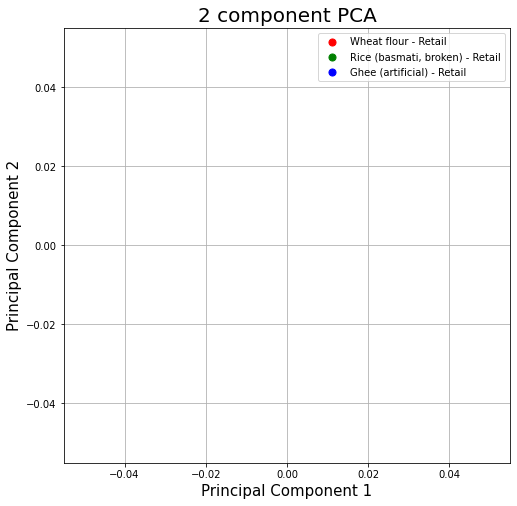

In [ ]:
#fig = plt.figure(figsize = (8,8))
#ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
#ax.set_title('2 component PCA', fontsize = 20)
#targets = ['Wheat flour - Retail', 'Rice (basmati, broken) - Retail', 'Ghee (artificial) - Retail']
#colors = ['r', 'g', 'b']
#for target, color in zip(targets,colors):
#    indicesToKeep = finalDf['price'] == target
#    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
#               , finalDf.loc[indicesToKeep, 'principal component 2']
#               , c = color
#               , s = 50)
#ax.legend(targets)
#ax.grid()

In [ ]:
#pca.explained_variance_ratio_

array([0.35065854, 0.20353515])